In [1]:
import pandas as pd
import sys
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt

# Precinct Shapefile

## VEST's Documentation File

Election results and precinct shapefile from the Minnesota Secretary of State (https://gisdata.mn.gov/dataset/bdry-electionresults-2012-2020)

- G18USSRNEW - Jim Newberger (Republican Party)
- G18USSDKLO - Amy Klobuchar (Democratic-Farmer-Labor Party)
- G18USSMSCH - Dennis Schuller (Legal Marijuana Now Party)
- G18USSGOVE - Paula M. Overby (Minnesota Green Party)
- G18USSOWRI - Write-in Votes


- S18USSRHOU - Karin Housley (Republican Party)
- S18USSDSMI - Tina Smith (Democratic-Farmer-Labor Party)
- S18USSMWEL - Sarah Wellington (Legal Marijuana Now Party)
- S18USSUTRO - Jerry Trooien (Unaffiliated)
- S18USSOWRI - Write-in Votes


- G18GOVRJOH - Jeff Johnson (Republican Party)
- G18GOVDWAL - Tim Walz (Democratic-Farmer-Labor Party)
- G18GOVMWRI - Chris Wright (Grassroots - Legalize Cannabis Party)
- G18GOVLWEL - Josh Welter (Libertarian Party)
- G18GOVOWRI - Write-in Votes


- G18SOSRHOW - John Howe (Republican Party)
- G18SOSDSIM - Steve Simon (Democratic-Farmer-Labor Party)
- G18SOSIDEN - William Denney (Independence Party)
- G18SOSOWRI - Write-in Votes


- G18AUDRMYH - Pam Myhra (Republican Party)
- G18AUDDBLA - Julie Blaha (Democratic-Farmer-Labor Party)
- G18AUDMFOR - Michael Ford (Legal Marijuana Now Party)
- G18AUDLDOC - Chris Dock (Libertarian Party)
- G18AUDOWRI - Write-in Votes


- G18ATGRWAR - Doug Wardlow (Republican Party)
- G18ATGDELL - Keith Ellison (Democratic-Farmer-Labor Party)
- G18ATGMJOH - Noah M. Johnson (Grassroots - Legalize Cannabis Party)
- G18ATGOWRI - Write-in Votes


## Load VEST's Final File

In [2]:
vest_shp = gp.read_file("./raw-from-source/VEST/mn_2018/mn_2018.shp")

In [3]:
vest_shp.shape

(4113, 44)

In [4]:
vest_shp.head(1)

,COUNTYNAME,COUNTYFIPS,VTDID,PCTNAME,PCTCODE,SHORTLABEL,MCDNAME,MCDCODE,MCDFIPS,MCDGNIS,...,G18AUDRMYH,G18AUDDBLA,G18AUDMFOR,G18AUDLDOC,G18AUDOWRI,G18ATGRWAR,G18ATGDELL,G18ATGMJOH,G18ATGOWRI,geometry
0,Aitkin,001,270010005,Aitkin,0005,None,Aitkin,004,00460,02393894,...,381,338,56,18,0,414,326,60,3,"POLYGON ((447378.031 5154733.389, 448085.138 5..."


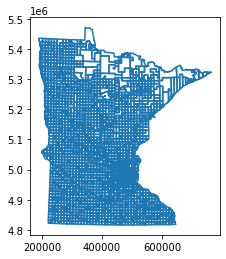

In [5]:
vest_shp.boundary.plot()

# Load the SOS File

In [6]:
gdf = gp.read_file('./raw-from-source/SOS/shp_bdry_electionresults_2012_2020/general_election_results_by_precinct_2018.shp')

In [7]:
gdf.head()

,VTDID,PCTNAME,PCTCODE,SHORTLABEL,MCDNAME,MCDCODE,MCDFIPS,MCDGNIS,CTU_TYPE,COUNTYNAME,...,MNAUDWI,MNAUDTOTAL,MNAGR,MNAGDFL,MNAGGLC,MNAGWI,MNAGTOTAL,Shape_Leng,Shape_Area,geometry
0,270010005,Aitkin,0005,None,Aitkin,004,00460,02393894,city,Aitkin,...,0,793,414,326,60,3,803,31638.833260,6.629747e+06,"POLYGON ((447378.031 5154733.389, 448085.138 5..."
1,270010010,Aitkin Twp,0010,None,Aitkin Twp,005,00478,00663389,township,Aitkin,...,0,467,312,137,24,1,474,67719.452182,8.780913e+07,"MULTIPOLYGON (((445904.069 5151658.489, 445903..."
2,270010015,Ball Bluff Twp,0015,None,Ball Bluff Twp,015,03358,00663498,township,Aitkin,...,0,155,79,66,9,0,154,38301.248800,9.148057e+07,"POLYGON ((485475.521 5207980.031, 485475.766 5..."
3,270010020,Balsam Twp,0020,None,Balsam Twp,020,03412,00663499,township,Aitkin,...,0,19,10,10,0,0,20,38988.094778,9.517941e+07,"POLYGON ((495441.473 5188825.678, 495423.020 5..."
4,270010025,Beaver Twp,0025,None,Beaver Twp,025,04384,00663536,township,Aitkin,...,0,36,12,21,2,0,35,38288.614190,9.135949e+07,"POLYGON ((495765.091 5140614.891, 494153.670 5..."


In [8]:
gdf.columns

Index(['VTDID', 'PCTNAME', 'PCTCODE', 'SHORTLABEL', 'MCDNAME', 'MCDCODE',
       'MCDFIPS', 'MCDGNIS', 'CTU_TYPE', 'COUNTYNAME', 'COUNTYCODE',
       'COUNTYFIPS', 'CONGDIST', 'MNSENDIST', 'MNLEGDIST', 'CTYCOMDIST',
       'JUDDIST', 'SWCDIST', 'SWCDIST_N', 'WARD', 'HOSPDIST', 'HOSPDIST_N',
       'PARKDIST', 'PARKDIST_N', 'TABSYSTEM', 'TABMODEL', 'MAILBALLOT',
       'REG7AM', 'SIGNATURES', 'EDR', 'AB_MB', 'FEDONLYAB', 'TOTVOTING',
       'USSENR', 'USSENDFL', 'USSENLMN', 'USSENMGP', 'USSENWI', 'USSENTOTAL',
       'USSSER', 'USSSEDFL', 'USSSELMN', 'USSSEUA', 'USSSEWI', 'USSSETOTAL',
       'USREPR', 'USREPDFL', 'USREPWI', 'USREPTOTAL', 'MNSENR', 'MNSENDFL',
       'MNSENWI', 'MNSENTOTAL', 'MNLEGR', 'MNLEGDFL', 'MNLEGWI', 'MNLEGTOTAL',
       'MNGOVR', 'MNGOVDFL', 'MNGOVGLC', 'MNGOVLIB', 'MNGOVWI', 'MNGOVTOTAL',
       'MNSOSR', 'MNSOSDFL', 'MNSOSIP', 'MNSOSWI', 'MNSOSTOTAL', 'MNAUDR',
       'MNAUDDFL', 'MNAUDLMN', 'MNAUDLP', 'MNAUDWI', 'MNAUDTOTAL', 'MNAGR',
       'MNAGDFL', 'MNAGG

The SOS file already has election results and the precinct shapefile joined together. 

In [9]:
gdf.columns = ['VTDID', 'PCTNAME', 'PCTCODE', 'SHORTLABEL', 'MCDNAME', 'MCDCODE',
       'MCDFIPS', 'MCDGNIS', 'CTU_TYPE', 'COUNTYNAME', 'COUNTYCODE',
       'COUNTYFIPS', 'CONGDIST', 'MNSENDIST', 'MNLEGDIST', 'CTYCOMDIST',
       'JUDDIST', 'SWCDIST', 'SWCDIST_N', 'WARD', 'HOSPDIST', 'HOSPDIST_N',
       'PARKDIST', 'PARKDIST_N', 'TABSYSTEM', 'TABMODEL', 'MAILBALLOT',
       'REG7AM', 'SIGNATURES', 'EDR', 'AB_MB', 'FEDONLYAB', 'TOTVOTING',
       'G18USSRNEW', 'G18USSDKLO', 'G18USSMSCH', 'G18USSGOVE', 'G18USSOWRI', 'USSENTOTAL',
       'S18USSRHOU', 'S18USSDSMI', 'S18USSMWEL', 'S18USSUTRO', 'S18USSOWRI', 'USSSETOTAL',
       'USREPR', 'USREPDFL', 'USREPWI', 'USREPTOTAL', 'MNSENR', 'MNSENDFL',
       'MNSENWI', 'MNSENTOTAL', 'MNLEGR', 'MNLEGDFL', 'MNLEGWI', 'MNLEGTOTAL',
       'G18GOVRJOH', 'G18GOVDWAL', 'G18GOVMWRI', 'G18GOVLWEL', 'G18GOVOWRI', 'MNGOVTOTAL',
       'G18SOSRHOW', 'G18SOSDSIM', 'G18SOSIDEN', 'G18SOSOWRI', 'MNSOSTOTAL', 'G18AUDRMYH',
       'G18AUDDBLA', 'G18AUDMFOR', 'G18AUDLDOC', 'G18AUDOWRI', 'MNAUDTOTAL', 'G18ATGRWAR',
       'G18ATGDELL', 'G18ATGMJOH', 'G18ATGOWRI', 'MNAGTOTAL', 'Shape_Leng', 'Shape_Area',
       'geometry']

# Join Files

In [10]:
print(vest_shp.shape)
print(gdf.shape)

(4113, 44)
(4113, 82)


In [11]:
merged_df = vest_shp.merge(gdf, how = 'outer', on = 'VTDID', indicator = True)
merged_df.groupby('_merge').count()

,COUNTYNAME_x,COUNTYFIPS_x,VTDID,PCTNAME_x,PCTCODE_x,SHORTLABEL_x,MCDNAME_x,MCDCODE_x,MCDFIPS_x,MCDGNIS_x,...,G18AUDOWRI_y,MNAUDTOTAL,G18ATGRWAR_y,G18ATGDELL_y,G18ATGMJOH_y,G18ATGOWRI_y,MNAGTOTAL,Shape_Leng,Shape_Area,geometry_y
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
both,4113,4113,4113,4113,4113,1708,4113,4113,4113,4113,...,4113,4113,4113,4113,4113,4113,4113,4113,4113,4113


# Validating Election Results

## Statewide

In [12]:
vest_shp.columns

Index(['COUNTYNAME', 'COUNTYFIPS', 'VTDID', 'PCTNAME', 'PCTCODE', 'SHORTLABEL',
       'MCDNAME', 'MCDCODE', 'MCDFIPS', 'MCDGNIS', 'CONGDIST', 'MNSENDIST',
       'MNLEGDIST', 'CTYCOMDIST', 'JUDDIST', 'G18USSRNEW', 'G18USSDKLO',
       'G18USSMSCH', 'G18USSGOVE', 'G18USSOWRI', 'S18USSRHOU', 'S18USSDSMI',
       'S18USSMWEL', 'S18USSUTRO', 'S18USSOWRI', 'G18GOVRJOH', 'G18GOVDWAL',
       'G18GOVMWRI', 'G18GOVLWEL', 'G18GOVOWRI', 'G18SOSRHOW', 'G18SOSDSIM',
       'G18SOSIDEN', 'G18SOSOWRI', 'G18AUDRMYH', 'G18AUDDBLA', 'G18AUDMFOR',
       'G18AUDLDOC', 'G18AUDOWRI', 'G18ATGRWAR', 'G18ATGDELL', 'G18ATGMJOH',
       'G18ATGOWRI', 'geometry'],
      dtype='object')

In [13]:
data_columns = ['G18USSRNEW', 'G18USSDKLO',
       'G18USSMSCH', 'G18USSGOVE', 'G18USSOWRI', 'S18USSRHOU', 'S18USSDSMI',
       'S18USSMWEL', 'S18USSUTRO', 'S18USSOWRI', 'G18GOVRJOH', 'G18GOVDWAL',
       'G18GOVMWRI', 'G18GOVLWEL', 'G18GOVOWRI', 'G18SOSRHOW', 'G18SOSDSIM',
       'G18SOSIDEN', 'G18SOSOWRI', 'G18AUDRMYH', 'G18AUDDBLA', 'G18AUDMFOR',
       'G18AUDLDOC', 'G18AUDOWRI', 'G18ATGRWAR', 'G18ATGDELL', 'G18ATGMJOH',
       'G18ATGOWRI']

print("Printing differences below")
for race in data_columns:
    if (sum(vest_shp[race])- gdf[race].sum() != 0):
        print(race+" has a difference of "+str(sum(vest_shp[race])-gdf[race].sum())+" votes")
        print("\tVEST: "+str(sum(vest_shp[race]))+" votes")
        print("\tSOURCES: "+str(gdf[race].sum())+" votes")
    else:
        print(race + " is equal", "\tVEST: " + str(sum(vest_shp[race])), "\tRDH: " + str(gdf[race].sum()))
print("")
print("All other races are equal")


Printing differences below
G18USSRNEW is equal 	VEST: 940437 	RDH: 940437
G18USSDKLO is equal 	VEST: 1566174 	RDH: 1566174
G18USSMSCH is equal 	VEST: 66236 	RDH: 66236
G18USSGOVE is equal 	VEST: 23101 	RDH: 23101
G18USSOWRI is equal 	VEST: 931 	RDH: 931
S18USSRHOU is equal 	VEST: 1095777 	RDH: 1095777
S18USSDSMI is equal 	VEST: 1370540 	RDH: 1370540
S18USSMWEL is equal 	VEST: 95614 	RDH: 95614
S18USSUTRO is equal 	VEST: 24324 	RDH: 24324
S18USSOWRI is equal 	VEST: 1101 	RDH: 1101
G18GOVRJOH is equal 	VEST: 1097705 	RDH: 1097705
G18GOVDWAL is equal 	VEST: 1393096 	RDH: 1393096
G18GOVMWRI is equal 	VEST: 68667 	RDH: 68667
G18GOVLWEL is equal 	VEST: 26735 	RDH: 26735
G18GOVOWRI is equal 	VEST: 1084 	RDH: 1084
G18SOSRHOW is equal 	VEST: 1109093 	RDH: 1109093
G18SOSDSIM is equal 	VEST: 1328502 	RDH: 1328502
G18SOSIDEN is equal 	VEST: 103610 	RDH: 103610
G18SOSOWRI is equal 	VEST: 1317 	RDH: 1317
G18AUDRMYH is equal 	VEST: 1095310 	RDH: 1095310
G18AUDDBLA is equal 	VEST: 1250524 	RDH: 125052

## County-by-County Totals

In [14]:
print("Counties with differences printed below:")
diff_counties=[]
for i in data_columns:
    diff = vest_shp.groupby(["COUNTYNAME"]).sum()[i]-gdf.groupby(["COUNTYNAME"]).sum()[i]
    for val in diff[diff != 0].index.values.tolist():
        if val not in diff_counties:
            diff_counties.append(val)
    if len(diff[diff != 0]!=0):
        print(i)
        print(diff[diff != 0].to_string(header=False))
print("")
print("All other races in all counties are equal")


Counties with differences printed below:

All other races in all counties are equal


## Precinct-by-Precinct Totals

In [15]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff >0):
                if(diff>0):
                    print(i, "{:.>72}".format(df.iloc[j]["VTDID"]), "(V)","{:.>5}".format(int(df.iloc[j][left_Data]))," (S){:.>5}".format(int(df.iloc[j][right_Data])),"(D):{:>5}".format(int(df.iloc[j][right_Data])-int(df.iloc[j][left_Data])))           
                #print(df.iloc[j]['countypct'])
                
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]["VTDID"])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    #print("New max diff is: ", str(max_diff))
                    #print(df.iloc[j]['cty_pct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]["VTDID"])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()
    print(diff_list)
    
validater_row(merged_df,data_columns)



There are  4113  total rows
0  of these rows have election result differences
4113  of these rows are the same

The max difference between any one shared column in a row is:  0
There are  0 precinct results with a difference greater than 10
[]
